<a href="https://colab.research.google.com/github/pixuleco06/Tads/blob/main/Analise_de_Dados_ProjetoTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.utils as shuffle

In [3]:
df = pd.read_csv('train.csv')

In [71]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Análise Exploratória e Visualização de Dados:

1. Explore a distribuição de características-chave, como idade, sexo, classe socioeconômica e taxa de sobrevivência.
R: Com base nos primeiros itens, encontrados no head, podemos dizer que a maior parte dos indivíduos que foram a óbito eram homens, que estavam em classes inferiores, como a 3ª classe por exemplo. Provavelmente eram trabalhadores e podemos afirmar isso também por serem pessoas mais jovens que estavam a trabalho provavelmente, na faixa etária de 20-25 anos.
2. Identifique padrões ou correlações entre as características e a sobrevivência dos passageiros.
R: Mulheres, de classe nobre (exceto uma), idade entre 20-40 anos.
3. Visualize esses padrões por meio de gráficos de barras, histogramas, gráficos de dispersão ou boxplots.
4. Investigue se existem diferenças na taxa de sobrevivência entre grupos, como homens e mulheres, ou diferentes classes de passageiros.
Uma diferença notável é o fato de grande parte/maioria dos que não conseguiram se salvar, era homens e da terceira classe. Grande parte que se salvou eram mulheres e de classes mais privilegiadas.

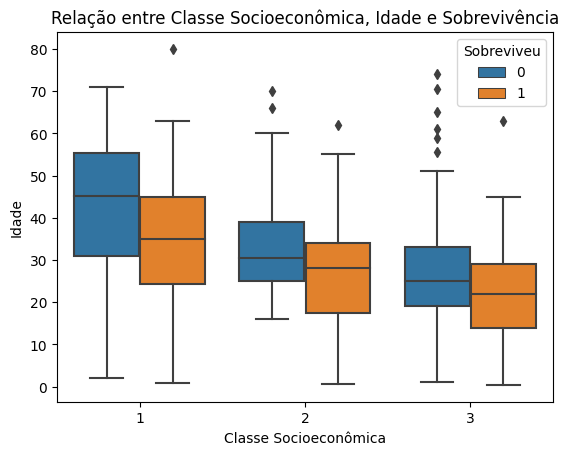

In [6]:
#2
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.xlabel('Classe Socioeconômica')
plt.ylabel('Idade')
plt.title('Relação entre Classe Socioeconômica, Idade e Sobrevivência')
plt.legend(title='Sobreviveu', loc='upper right')
plt.show()

<Axes: >

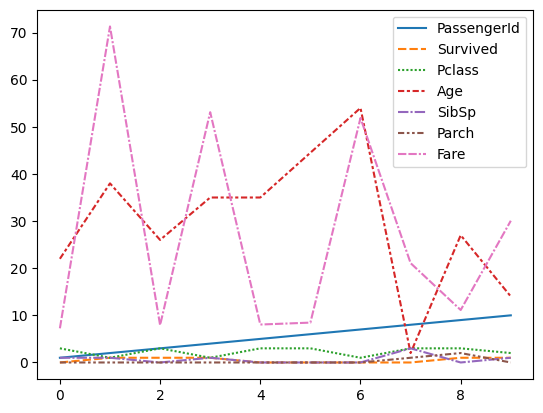

In [7]:
#3
df_10_primeiros = df.head(10)
sns.lineplot(data = df_10_primeiros)

<Axes: >

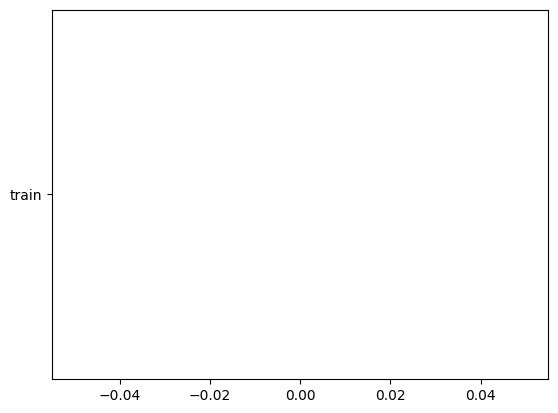

In [8]:
#4
sns.lineplot(data = 'train')

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

In [10]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [11]:
x_falso = np.arange(10)
x_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.random.seed(0)
train_test_split(x_falso, test_size=0.5)

[array([6, 7, 3, 0, 5]), array([2, 8, 4, 9, 1])]

In [41]:
np.random.seed(1)
X_treino, X_valid, y_treino, y_valid = train_test_split(X,y, test_size=0.5)

In [42]:
X_treino.head()

,Sex_binario,Age
394,1,24.00
851,0,74.00
373,0,22.00
523,1,44.00
78,0,0.83


In [43]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [44]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [45]:
p = modelo.predict(X_valid)

In [46]:
np.mean(y_valid == p)

0.7466367713004485

In [47]:
p = (X_valid ['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7623318385650224

In [48]:
x_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
from sklearn.model_selection import KFold

In [17]:
kf = KFold(3, shuffle=True, random_state=0)
for linhas_treino, linhas_valid in kf.split(x_falso):
  print("treino: ", linhas_treino )
  print("valid: ",linhas_valid)
  print()

treino:  [0 1 3 5 6 7]
valid:  [2 4 8 9]

treino:  [0 2 3 4 5 8 9]
valid:  [1 6 7]

treino:  [1 2 4 6 7 8 9]
valid:  [0 3 5]



In [55]:
from sklearn.utils import shuffle

resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("treino: ", linhas_treino.shape[0])
    print("valid: ", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    X_treino, y_treino = shuffle(X_treino, y_treino, random_state=10)  # Embaralhar os dados de treinamento

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()


treino:  445
valid:  446
Acc: 0.757847533632287

treino:  446
valid:  445
Acc: 0.7595505617977528

treino:  445
valid:  446
Acc: 0.7399103139013453

treino:  446
valid:  445
Acc: 0.7617977528089888

treino:  445
valid:  446
Acc: 0.7600896860986547

treino:  446
valid:  445
Acc: 0.7730337078651686

treino:  445
valid:  446
Acc: 0.7354260089686099

treino:  446
valid:  445
Acc: 0.755056179775281

treino:  445
valid:  446
Acc: 0.7399103139013453

treino:  446
valid:  445
Acc: 0.797752808988764

treino:  445
valid:  446
Acc: 0.7645739910313901

treino:  446
valid:  445
Acc: 0.7595505617977528

treino:  445
valid:  446
Acc: 0.7623318385650224

treino:  446
valid:  445
Acc: 0.7415730337078652

treino:  445
valid:  446
Acc: 0.7556053811659192

treino:  446
valid:  445
Acc: 0.7460674157303371

treino:  445
valid:  446
Acc: 0.7443946188340808

treino:  446
valid:  445
Acc: 0.7707865168539326

treino:  445
valid:  446
Acc: 0.7443946188340808

treino:  446
valid:  445
Acc: 0.7662921348314606



In [58]:
from ast import increment_lineno
%matpltlib increment_lineno
%pylab increment_lineno

UsageError: Line magic function `%matpltlib` not found.


(array([4., 3., 0., 6., 4., 1., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

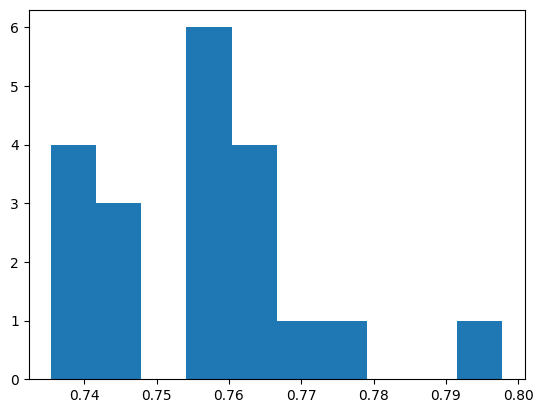

In [59]:
import matplotlib.pyplot as plt

plt.hist(resultados)

In [36]:
resultados

[0.7713004484304933,
 0.7797752808988764,
 0.7443946188340808,
 0.7955056179775281,
 0.7757847533632287,
 0.7887640449438202,
 0.7533632286995515,
 0.7573033707865169,
 0.7354260089686099,
 0.7415730337078652,
 0.7219730941704036,
 0.7056179775280899,
 0.7757847533632287,
 0.7303370786516854,
 0.7040358744394619,
 0.7348314606741573,
 0.7488789237668162,
 0.7887640449438202,
 0.7623318385650224,
 0.7842696629213484]

In [37]:
np.mean(resultados)

0.7550007557817302

In [38]:
p = (X_valid ['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid==p)

0.797752808988764

In [39]:
variaveis = ['Sex_binario','Age']

In [72]:
def transformar_sexo(valor):
  if valor == 'female':
    return 1
  else:
    return 0

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
variaveis = ['Sex_binario','Age']

In [23]:
X = train[variaveis]
y = train['Survived']

In [24]:
X.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [25]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
X = X.fillna(-1)

In [27]:
modelo.fit(X,y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [28]:
test['Sex_binario'] = test ['Sex'].map(transformar_sexo)

In [29]:
X_prev = test[variaveis]
X_prev = X_prev.fillna(-1)
X_prev.head()

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [30]:
p = modelo.predict(X_prev)
p

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [32]:
sub = pd.Series(p, index=test['PassengerId'])
sub.shape

(418,)

In [33]:
sub = pd.Series(p, index=test ['PassengerId'], name = 'Survived')
sub.shape

(418,)

In [73]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp','Parch','Fare']

In [75]:
X = train[variaveis].fillna(-1)
y = train['Survived']

In [64]:
from sklearn.utils import shuffle

resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("treino: ", linhas_treino.shape[0])
    print("valid: ", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    X_treino, y_treino = shuffle(X_treino, y_treino, random_state=10)  # Embaralhar os dados de treinamento

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()


treino:  445
valid:  446
Acc: 0.7914798206278026

treino:  446
valid:  445
Acc: 0.7842696629213484

treino:  445
valid:  446
Acc: 0.8161434977578476

treino:  446
valid:  445
Acc: 0.8089887640449438

treino:  445
valid:  446
Acc: 0.7914798206278026

treino:  446
valid:  445
Acc: 0.7932584269662921

treino:  445
valid:  446
Acc: 0.8116591928251121

treino:  446
valid:  445
Acc: 0.7797752808988764

treino:  445
valid:  446
Acc: 0.8161434977578476

treino:  446
valid:  445
Acc: 0.8112359550561797

treino:  445
valid:  446
Acc: 0.8094170403587444

treino:  446
valid:  445
Acc: 0.8044943820224719

treino:  445
valid:  446
Acc: 0.7959641255605381

treino:  446
valid:  445
Acc: 0.8134831460674158

treino:  445
valid:  446
Acc: 0.8071748878923767

treino:  446
valid:  445
Acc: 0.7887640449438202

treino:  445
valid:  446
Acc: 0.8318385650224215

treino:  446
valid:  445
Acc: 0.8089887640449438

treino:  445
valid:  446
Acc: 0.804932735426009

treino:  446
valid:  445
Acc: 0.8157303370786517



(array([2., 1., 3., 1., 2., 4., 6., 0., 0., 1.]),
 array([0.77977528, 0.78498161, 0.79018794, 0.79539427, 0.80060059,
        0.80580692, 0.81101325, 0.81621958, 0.82142591, 0.82663224,
        0.83183857]),
 <BarContainer object of 10 artists>)

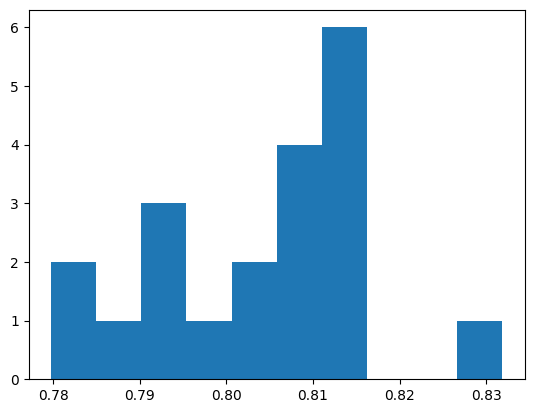

In [66]:
import matplotlib.pyplot as plt

plt.hist(resultados)

In [67]:
np.mean(resultados)

0.8042610973950722

In [80]:
X.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [81]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [82]:
test[variaveis].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [83]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X,y)

p = modelo.predict(test[variaveis].fillna(-1))

In [84]:
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [86]:
!head -n10 modelo_video5.csv

PassengerId,Survived
892,0
893,1
894,0
895,1
896,1
897,0
898,1
899,0
900,1
